In [58]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn import metrics

In [4]:
encoder_lbl = LabelEncoder()

In [5]:
original_dataset = pd.read_csv('data/HR_Abandono.csv', sep=';')
original_dataset['satisfaction_level'] = original_dataset['satisfaction_level'].replace(',', '.', regex=True).astype(float)
original_dataset['last_evaluation'] = original_dataset['satisfaction_level'].replace(',', '.', regex=True).astype(float)
original_dataset.head()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,0.38,0.38,157,3,0,1,0,low,2,sales
1,2,0.80,0.80,262,6,0,1,0,medium,5,sales
2,3,0.11,0.11,272,4,0,1,0,medium,6,sales
3,4,0.72,0.72,223,5,0,1,0,low,5,sales
4,5,0.37,0.37,159,3,0,1,0,low,2,sales


In [69]:
original_dataset[['salary']] = original_dataset[['salary']].apply(encoder_lbl.fit_transform)
original_dataset.head()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,0.38,0.38,157,3,0,1,0,1,2,sales
1,2,0.80,0.80,262,6,0,1,0,2,5,sales
2,3,0.11,0.11,272,4,0,1,0,2,6,sales
3,4,0.72,0.72,223,5,0,1,0,1,5,sales
4,5,0.37,0.37,159,3,0,1,0,1,2,sales


In [70]:
original_dataset['depto'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [71]:
dataset = original_dataset.copy()
encoder_1hot = OneHotEncoder()
categorical_features = ['depto']
onehot_encoded = encoder_1hot.fit_transform(dataset[categorical_features]).toarray()
onehot_encoded = pd.DataFrame(onehot_encoded, columns=encoder_1hot.get_feature_names_out(categorical_features))
dataset = pd.concat([dataset, onehot_encoded], axis=1)
dataset = dataset.drop(columns=categorical_features)
dataset.head()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto_IT,depto_RandD,depto_accounting,depto_hr,depto_management,depto_marketing,depto_product_mng,depto_sales,depto_support,depto_technical
0,1,0.38,0.38,157,3,0,1,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,0.80,0.80,262,6,0,1,0,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,0.11,0.11,272,4,0,1,0,2,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,0.72,0.72,223,5,0,1,0,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0.37,0.37,159,3,0,1,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
original_dataset.describe()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612823,0.612823,201.083672,3.407027,0.144610,0.238083,0.021268,1.347290,3.785986
std,4329.982679,0.248655,0.248655,50.182121,1.176120,0.351719,0.425924,0.144281,0.625819,1.194539
min,1.000000,0.010000,0.010000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3750.500000,0.440000,0.440000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,7500.000000,0.640000,0.640000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,11249.500000,0.820000,0.820000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000,5.000000
max,14999.000000,1.000000,1.000000,810.000000,6.000000,1.000000,1.000000,1.000000,2.000000,6.000000


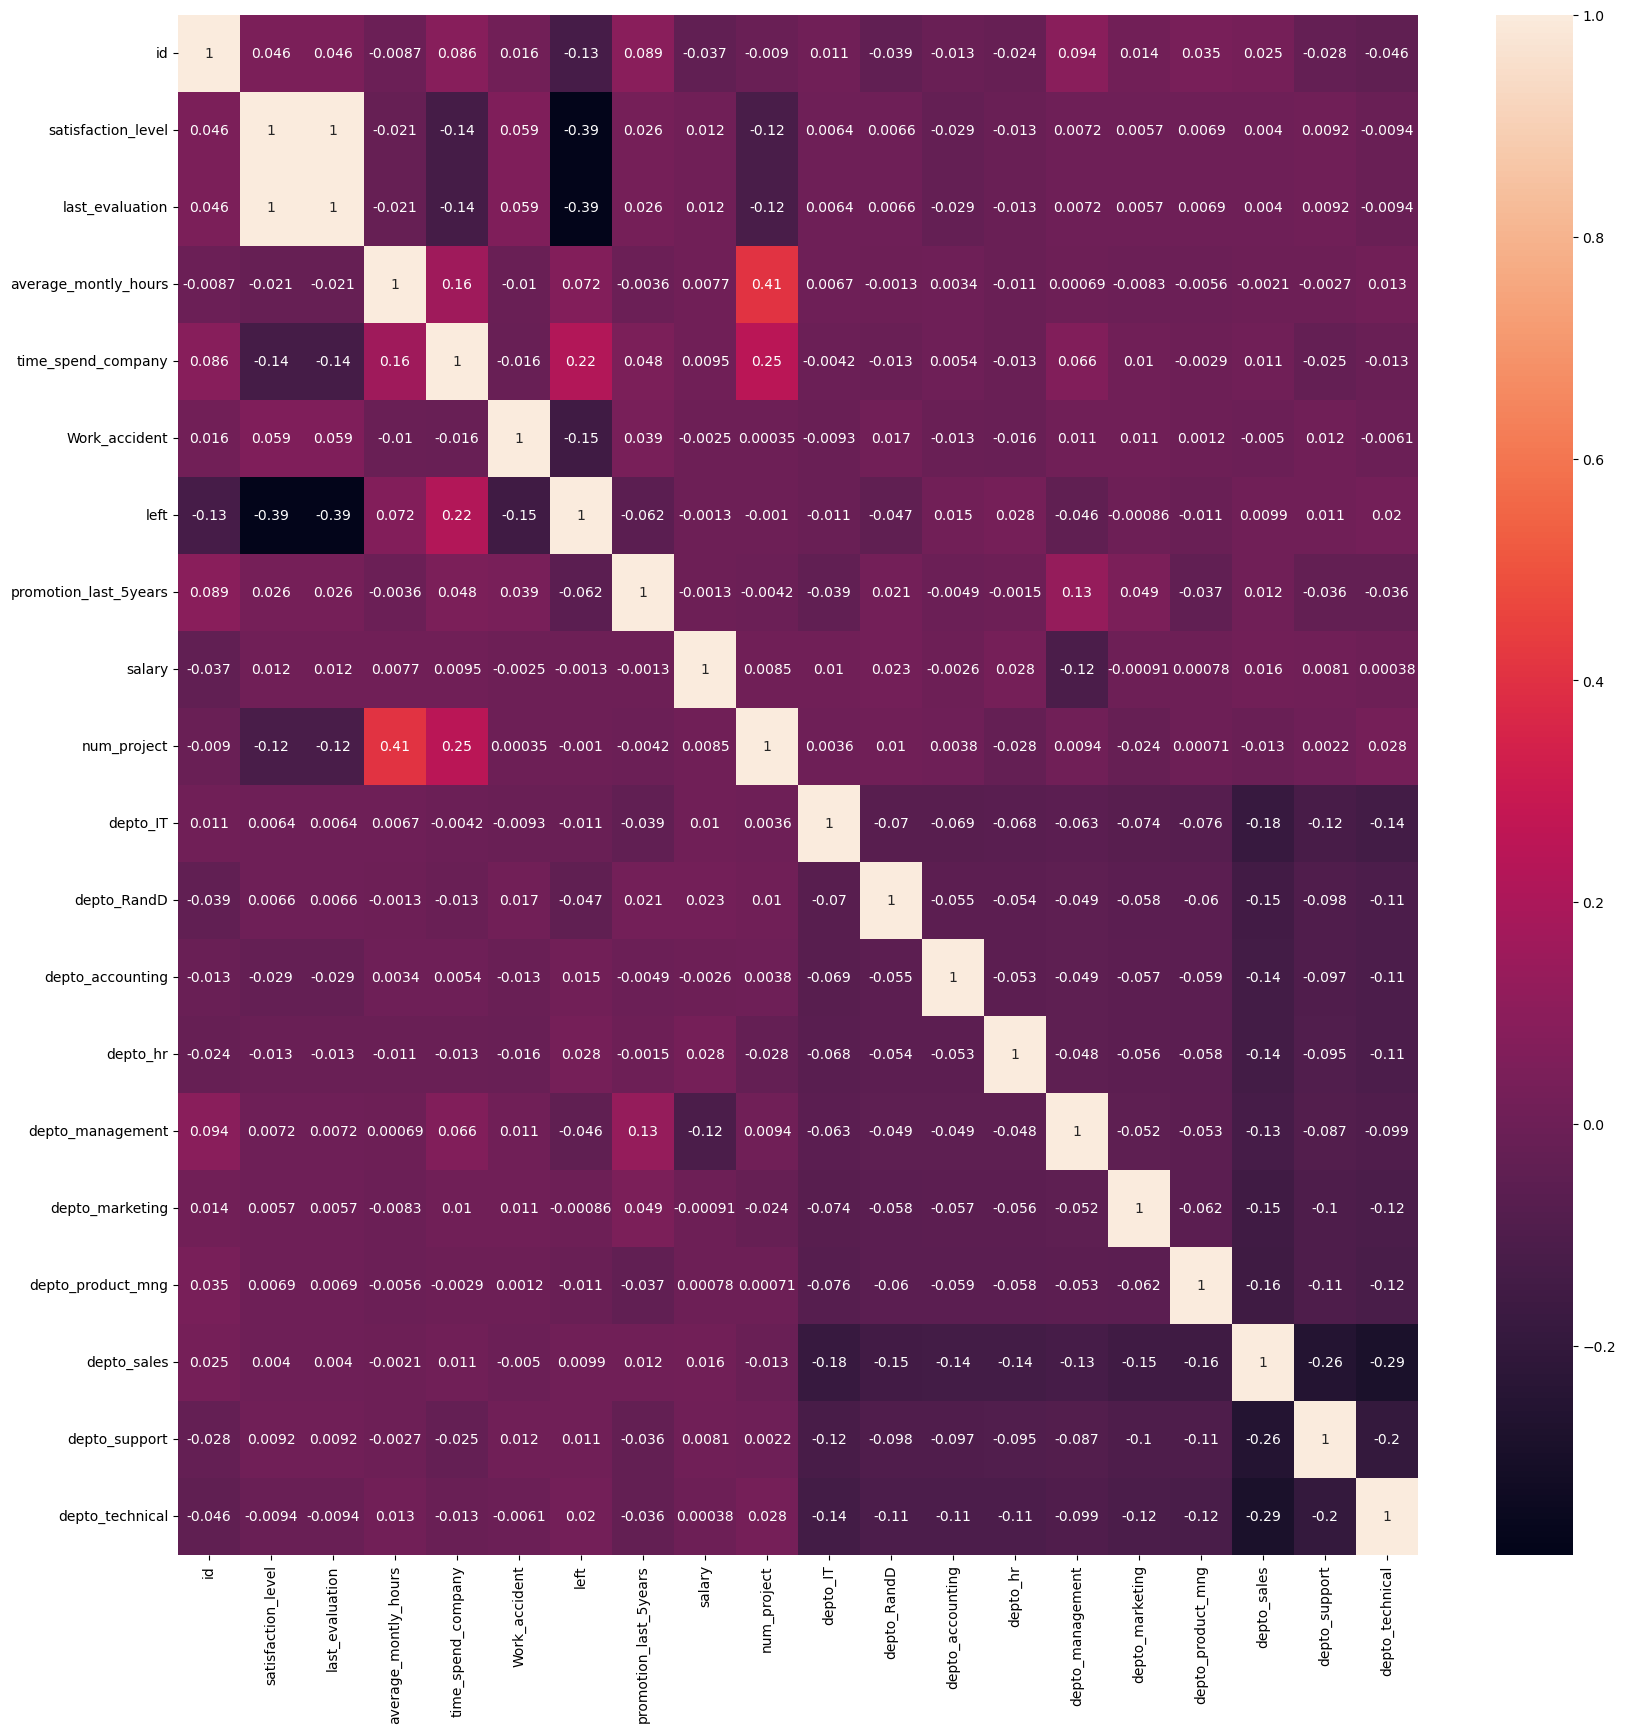

In [74]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.show()